<a href="https://colab.research.google.com/github/bootycurry/eda-assessment/blob/main/22BDS0142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course Project
**Name:** Harshit Vootukuri <br />
**Registration Number:** 22BDS0142 <br />

## Module 1
**Date:** 9th August, 2025

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/HepatitisCdata.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


### Dimensions of The Dataset

In [ ]:
df.shape

(615, 14)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

### Analyzing The Types of data in The Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


From this we understand that `Category` and `Sex` are non numerical values. Now we can check if they are categorical attributes.

In [ ]:
df.Category.value_counts()

,count
Category,
0=Blood Donor,533
3=Cirrhosis,30
1=Hepatitis,24
2=Fibrosis,21
0s=suspect Blood Donor,7


In [ ]:
df.Sex.value_counts()

,count
Sex,
m,377
f,238


#### Summary
from the code run in above cells we can conclude the following points:
- The dataset contains all numerical attributes except `Category` and `Sex`.
- The attributes `Category` and `Sex` are **Nominal Categorical** data.

## Module 2
**Date:** 10th August, 2025

### Data Transformation Techniques
#### 1. Data Cleaning

In [ ]:
df.head(3)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3


From this dataset it is eveident that the first column `Unnamed: 0` is an index column which is not useful for analysis. Hence this column can be dropped.

In [ ]:
df = df.drop("Unnamed: 0", axis=1)
df.head(3)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3


#### 2. Data Deduplication
This process involves checking and handling of duplicate values in the dataset.

In [ ]:
df.duplicated().value_counts()

,count
False,615


From this result, we can confirm that none of the rows are duplicated in the dataset.

#### 3. Replacing Values

In [ ]:
replace_df = df.copy()

replace_df.Sex.value_counts()

,count
Sex,
m,377
f,238


In [ ]:
replace_df.replace(to_replace="m", value=0, inplace=True)
replace_df.replace(to_replace="f", value=1, inplace=True)
replace_df.Sex.value_counts()

/tmp/ipython-input-628216859.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  replace_df.replace(to_replace="f", value=1, inplace=True)


,count
Sex,
0,377
1,238


#### 4. Handling Missing Data

Let us look at the various techniques used to check for missing data in the dataframe.

In [ ]:
df.isnull()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,True,False,False,False,False,False,False,False,False


Let us get the count of missing values per attribute and the total count of missing values.

In [ ]:
print(df.isnull().sum())


print("\n\nTotal missing values in the dataset:", df.isnull().sum().sum())


Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


Total missing values in the dataset: 31


Handling Missing values in `ALB`:

In [ ]:
cleaned_df = df.copy()

alb_null_indices = cleaned_df[cleaned_df['ALB'].isnull()].index
cleaned_df.loc[alb_null_indices]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
603,3=Cirrhosis,65,m,NaN,NaN,40.0,54.0,13.0,7.5,NaN,70.0,107.0,79.0


In [ ]:
alb_mean = cleaned_df['ALB'].mean()
cleaned_df['ALB'] = cleaned_df['ALB'].fillna(alb_mean) # filling the null values with mean

cleaned_df.loc[alb_null_indices]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
603,3=Cirrhosis,65,m,41.620195,NaN,40.0,54.0,13.0,7.5,NaN,70.0,107.0,79.0


Handling missing values in `ALP`:

In [ ]:
alp_null_indices = cleaned_df[cleaned_df['ALP'].isnull()].index
cleaned_df.loc[alp_null_indices]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
541,1=Hepatitis,19,m,41.000000,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,1=Hepatitis,29,m,49.000000,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0
546,1=Hepatitis,30,m,45.000000,NaN,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0
568,2=Fibrosis,49,m,39.000000,NaN,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81.0
569,2=Fibrosis,49,m,46.000000,NaN,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82.0
570,2=Fibrosis,50,m,42.000000,NaN,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84.0
571,2=Fibrosis,53,m,46.000000,NaN,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76.0
576,2=Fibrosis,71,m,37.000000,NaN,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76.0
581,2=Fibrosis,49,f,39.000000,NaN,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79.0
582,2=Fibrosis,51,f,37.000000,NaN,164.0,70.0,9.0,3.99,4.2,67.0,43.0,72.0


In [ ]:
cleaned_df['ALP'] = cleaned_df['ALP'].ffill() # Filling the missing values using forward fill

cleaned_df.loc[alp_null_indices]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
541,1=Hepatitis,19,m,41.000000,56.3,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,1=Hepatitis,29,m,49.000000,27.5,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0
546,1=Hepatitis,30,m,45.000000,27.5,66.0,45.0,14.0,12.16,6.1,86.0,43.0,77.0
568,2=Fibrosis,49,m,39.000000,45.2,118.0,62.0,10.0,7.28,3.5,72.0,74.0,81.0
569,2=Fibrosis,49,m,46.000000,45.2,114.0,75.0,16.0,10.43,5.2,72.0,59.0,82.0
570,2=Fibrosis,50,m,42.000000,45.2,258.0,106.0,15.0,8.74,4.7,77.0,80.0,84.0
571,2=Fibrosis,53,m,46.000000,45.2,34.0,43.0,14.0,8.77,4.0,112.0,203.0,76.0
576,2=Fibrosis,71,m,37.000000,35.7,130.0,90.0,15.0,9.92,4.7,79.0,77.0,76.0
581,2=Fibrosis,49,f,39.000000,22.9,46.0,39.0,9.0,10.21,3.1,89.0,53.0,79.0
582,2=Fibrosis,51,f,37.000000,22.9,164.0,70.0,9.0,3.99,4.2,67.0,43.0,72.0


Handling missing values in `ALT`

In [ ]:
alt_null_indices = cleaned_df[cleaned_df['ALT'].isnull()].index
cleaned_df.loc[alt_null_indices]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
540,1=Hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0


In [ ]:
cleaned_df = cleaned_df.dropna(subset=['ALT']) # dropping the row with null values in ALT

print("\nDataFrame shape after dropping rows with null ALT values:")
print(cleaned_df.shape)
print("\nChecking if any null values are left in ALT column:")
print(cleaned_df['ALT'].isnull().sum())


DataFrame shape after dropping rows with null ALT values:
(614, 13)

Checking if any null values are left in ALT column:
0


Handling missing values in `CHOL` and `PROT`:

In [ ]:
chol_null_indices = cleaned_df[cleaned_df['CHOL'].isnull()].index
prot_null_indices = cleaned_df[cleaned_df['PROT'].isnull()].index

print("DataFrame section with null CHOL values:")
cleaned_df.loc[chol_null_indices]

DataFrame section with null CHOL values:


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
121,0=Blood Donor,43,m,48.600000,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
319,0=Blood Donor,32,f,47.400000,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,0=Blood Donor,33,f,42.400000,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,0=Blood Donor,46,f,42.900000,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,0=Blood Donor,48,f,45.600000,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
433,0=Blood Donor,48,f,46.800000,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
498,0=Blood Donor,57,f,48.400000,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
584,2=Fibrosis,75,f,36.000000,22.9,114.0,125.0,14.0,6.65,NaN,57.0,177.0,72.0
590,3=Cirrhosis,46,m,20.000000,11.3,62.0,113.0,254.0,1.48,NaN,114.0,138.0,NaN
603,3=Cirrhosis,65,m,41.620195,102.9,40.0,54.0,13.0,7.50,NaN,70.0,107.0,79.0


In [ ]:
print("\nDataFrame section with null PROT values:")
cleaned_df.loc[prot_null_indices]


DataFrame section with null PROT values:


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
590,3=Cirrhosis,46,m,20.0,11.3,62.0,113.0,254.0,1.48,NaN,114.0,138.0,NaN


In [ ]:
chol_mean = cleaned_df['CHOL'].mean()
prot_mean = cleaned_df['PROT'].mean()

cleaned_df['CHOL'] = cleaned_df['CHOL'].fillna(chol_mean) # filling with mean
cleaned_df['PROT'] = cleaned_df['PROT'].bfill() # backward fill

In [ ]:
print("DataFrame after filling null CHOL values:")
cleaned_df.loc[chol_null_indices]

DataFrame after filling null CHOL values:


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
121,0=Blood Donor,43,m,48.600000,45.0,10.5,40.5,5.3,7.09,5.367053,63.0,25.1,70.0
319,0=Blood Donor,32,f,47.400000,52.5,19.1,17.1,4.6,10.19,5.367053,63.0,23.0,72.2
329,0=Blood Donor,33,f,42.400000,137.2,14.2,13.1,3.4,8.23,5.367053,48.0,25.7,74.4
413,0=Blood Donor,46,f,42.900000,55.1,15.2,29.8,3.6,8.37,5.367053,61.0,29.0,71.9
424,0=Blood Donor,48,f,45.600000,107.2,24.4,39.0,13.8,9.77,5.367053,88.0,38.0,75.1
433,0=Blood Donor,48,f,46.800000,93.3,10.0,23.2,4.3,12.41,5.367053,52.0,23.9,72.4
498,0=Blood Donor,57,f,48.400000,94.4,2.5,39.6,2.3,8.84,5.367053,82.0,6.4,76.8
584,2=Fibrosis,75,f,36.000000,22.9,114.0,125.0,14.0,6.65,5.367053,57.0,177.0,72.0
590,3=Cirrhosis,46,m,20.000000,11.3,62.0,113.0,254.0,1.48,5.367053,114.0,138.0,69.1
603,3=Cirrhosis,65,m,41.620195,102.9,40.0,54.0,13.0,7.50,5.367053,70.0,107.0,79.0


In [ ]:
print("DataFrame after filling null PROT values:")
cleaned_df.loc[prot_null_indices]

DataFrame after filling null PROT values:


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
590,3=Cirrhosis,46,m,20.0,11.3,62.0,113.0,254.0,1.48,5.367053,114.0,138.0,69.1


### Discretization and Binning Techniques
#### 1. Equal Width Binning

In [ ]:
bin_df = df.copy()
bin_df['Age_equal_width_bins'] = pd.cut(bin_df['Age'], bins=3, labels=['Young', 'Middle-Aged', 'Senior'])
category = pd.cut(bin_df['Age'], bins=3)
category.value_counts()

,count
Age,
"(38.333, 57.667]",367
"(18.942, 38.333]",145
"(57.667, 77.0]",103


In [ ]:
print("Value counts for Equal-Width Bins:")
bin_df['Age_equal_width_bins'].value_counts()

Value counts for Equal-Width Bins:


,count
Age_equal_width_bins,
Middle-Aged,367
Young,145
Senior,103


#### 2. Equal Frequency Binning

In [ ]:
bin_df['Age_equal_freq_bins'] = pd.qcut(bin_df['Age'], q=3, labels=['Younger', 'Mid-Age', 'Older'])
pd.qcut(bin_df['Age'], q=3).value_counts()

,count
Age,
"(18.999, 43.0]",223
"(43.0, 52.0]",207
"(52.0, 77.0]",185


In [ ]:
bin_df['Age_equal_freq_bins'].value_counts()

,count
Age_equal_freq_bins,
Younger,223
Mid-Age,207
Older,185


### Outlier Detection and Filtering

The steps for outlier detection are:
1. Calculating First and Third Quartiles (Q1 and Q3 respectively)
2. Calculating IQR = Q3 - Q1
3. lower bound = Q1 - 1.5 * IQR
4. upper bound = Q3 + 1.5 * IQR

The samples of data which have the attribute value lower than the lower bound or higher than the upper bound are considered outliers.

In [ ]:
Q1 = cleaned_df['AST'].quantile(0.25)
Q3 = cleaned_df['AST'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

Lower Bound for Outliers: 4.650000000000006
Upper Bound for Outliers: 49.849999999999994


In [ ]:
iqr_outliers = cleaned_df[(cleaned_df['AST'] < lower_bound) | (cleaned_df['AST'] > upper_bound)]

print(f"There are {len(iqr_outliers)} outliers")

# Filtering Outliers
df_filtered_iqr = cleaned_df[~((cleaned_df['AST'] < lower_bound) | (cleaned_df['AST'] > upper_bound))]
df_filtered_iqr.shape

There are 64 outliers


(550, 13)

## Module 3
**Date:** 15th August, 2025

### Univariate Analysis

#### Age Analysis

In [ ]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mode = df['Age'].mode()[0]
age_std = df['Age'].std()
age_variance = df['Age'].var()
age_range = df['Age'].max() - df['Age'].min()

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
age_iqr = Q3 - Q1

print(f"Mean of Age: {age_mean:.2f}")
print(f"Median of Age: {age_median:.2f}")
print(f"Mode of Age: {age_mode}")
print(f"Standard Deviation of Age: {age_std:.2f}")
print(f"Variance of Age: {age_variance:.2f}")
print(f"Range of Age: {age_range}")
print(f"IQR of Age: {age_iqr:.2f}")

Mean of Age: 47.41
Median of Age: 47.00
Mode of Age: 46
Standard Deviation of Age: 10.06
Variance of Age: 101.11
Range of Age: 58
IQR of Age: 15.00


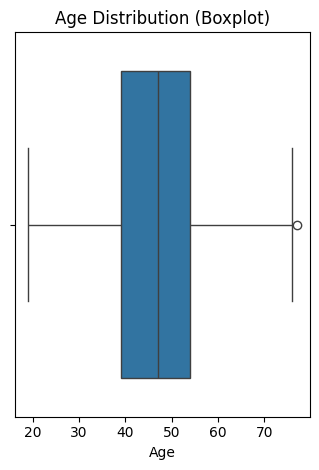

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.title('Age Distribution (Boxplot)')
plt.tight_layout()
plt.show()

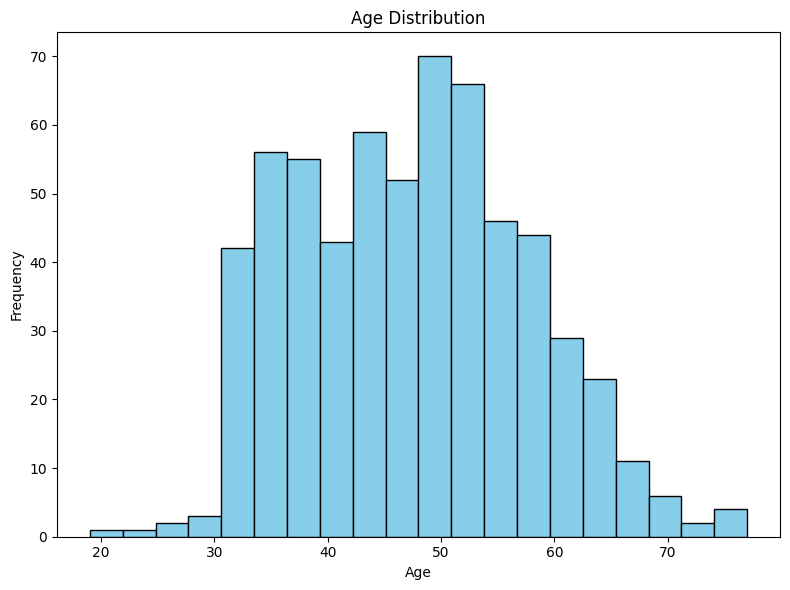

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()

#### Patient Category Analysis

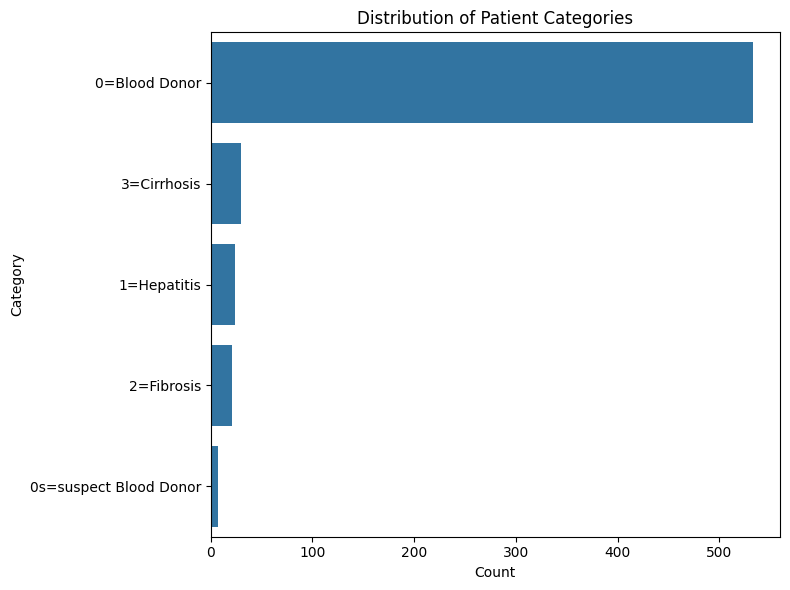

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df['Category'], order = df['Category'].value_counts().index)
plt.title('Distribution of Patient Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()

### Bivariate Analysis

#### Scatterplot

Correlation between ALT and AST: 0.27


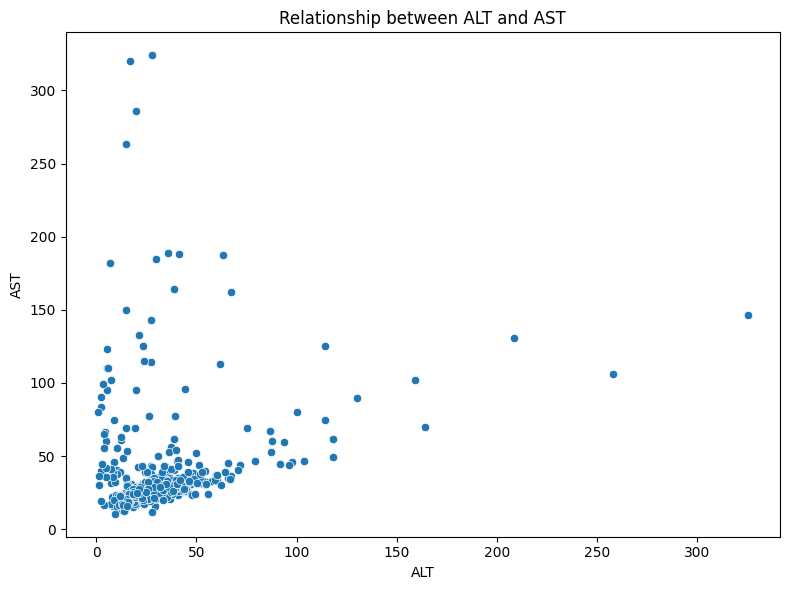

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ALT', y='AST', data=df)
plt.title('Relationship between ALT and AST')
plt.tight_layout()

correlation = df['ALT'].corr(df['AST'])
print(f"Correlation between ALT and AST: {correlation:.2f}")

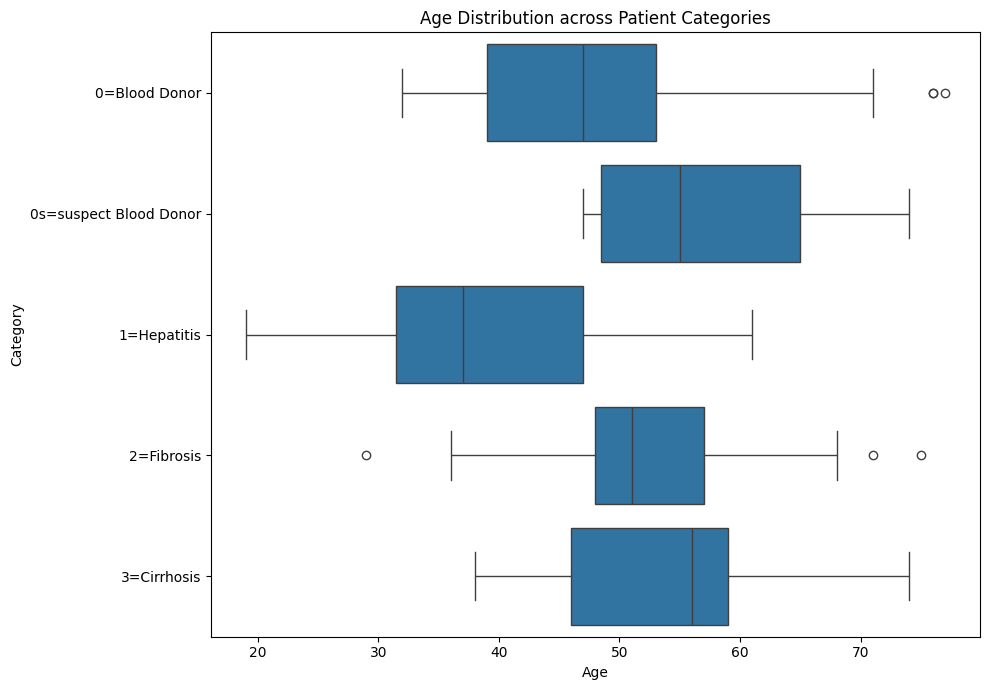

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Age', y='Category', data=df)
plt.title('Age Distribution across Patient Categories')
plt.tight_layout()

In [ ]:
np.corrcoef(cleaned_df["CHOL"], cleaned_df["PROT"])

array([[1.        , 0.20855923],
       [0.20855923, 1.        ]])

### Multivariate Analysis

#### Correlation Matrix

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

corr_mt = df[numerical_columns].corr()
corr_mt

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.153668
ALB,-0.197498,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.557197
ALP,0.173340,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109
ALT,-0.006021,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.094730
AST,0.088666,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,0.040071
BIL,0.032492,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.047638
CHE,-0.075093,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.295427
CHOL,0.125641,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071
CREA,-0.022296,-0.001573,0.149832,-0.043025,-0.021387,0.031224,-0.011157,-0.047744,1.000000,0.121003,-0.031704
GGT,0.153087,-0.155749,0.454630,0.248114,0.491263,0.217024,-0.110345,-0.006895,0.121003,1.000000,-0.011767


#### Heatmap

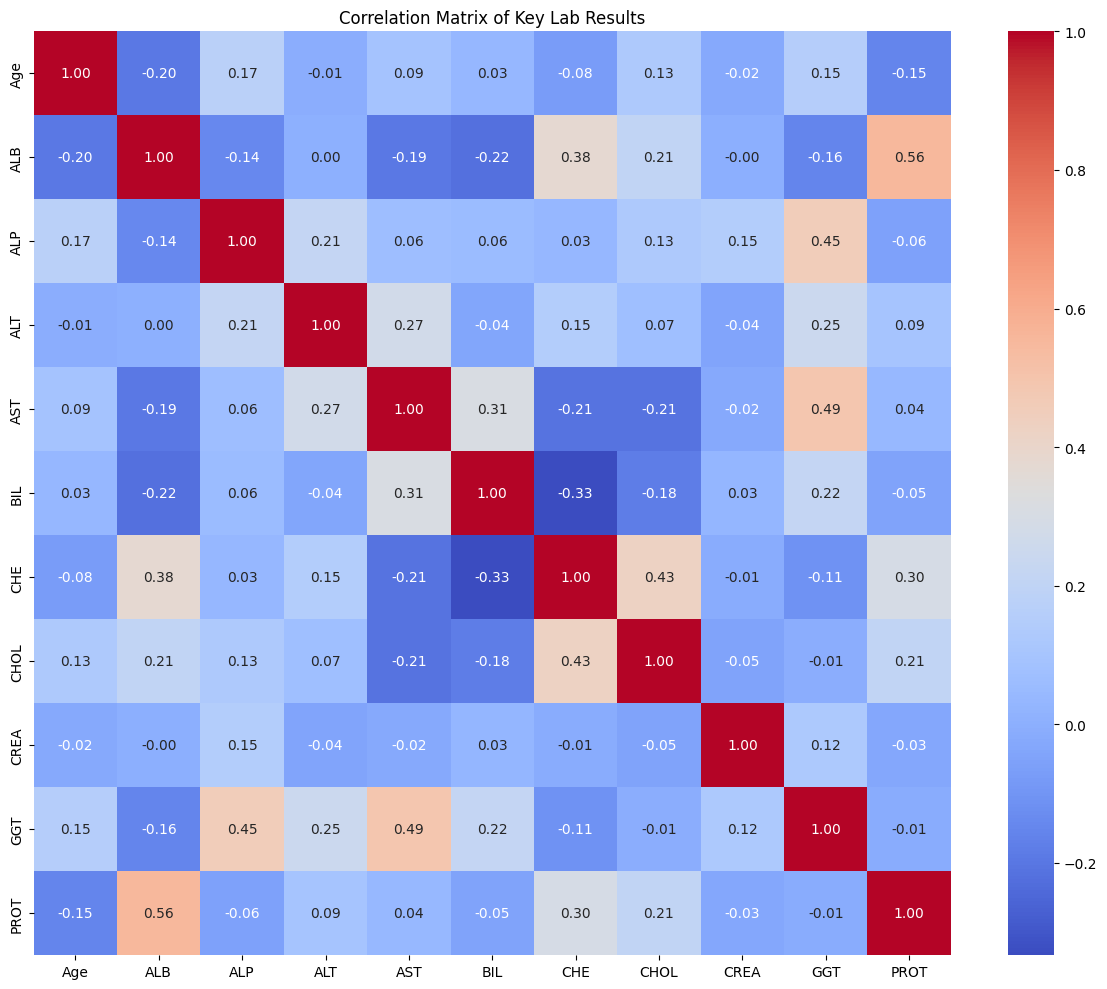

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mt, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Lab Results')
plt.tight_layout()

#### Pairplots

Text(0.5, 1.02, 'Pair Plot of Lab Results by Category')

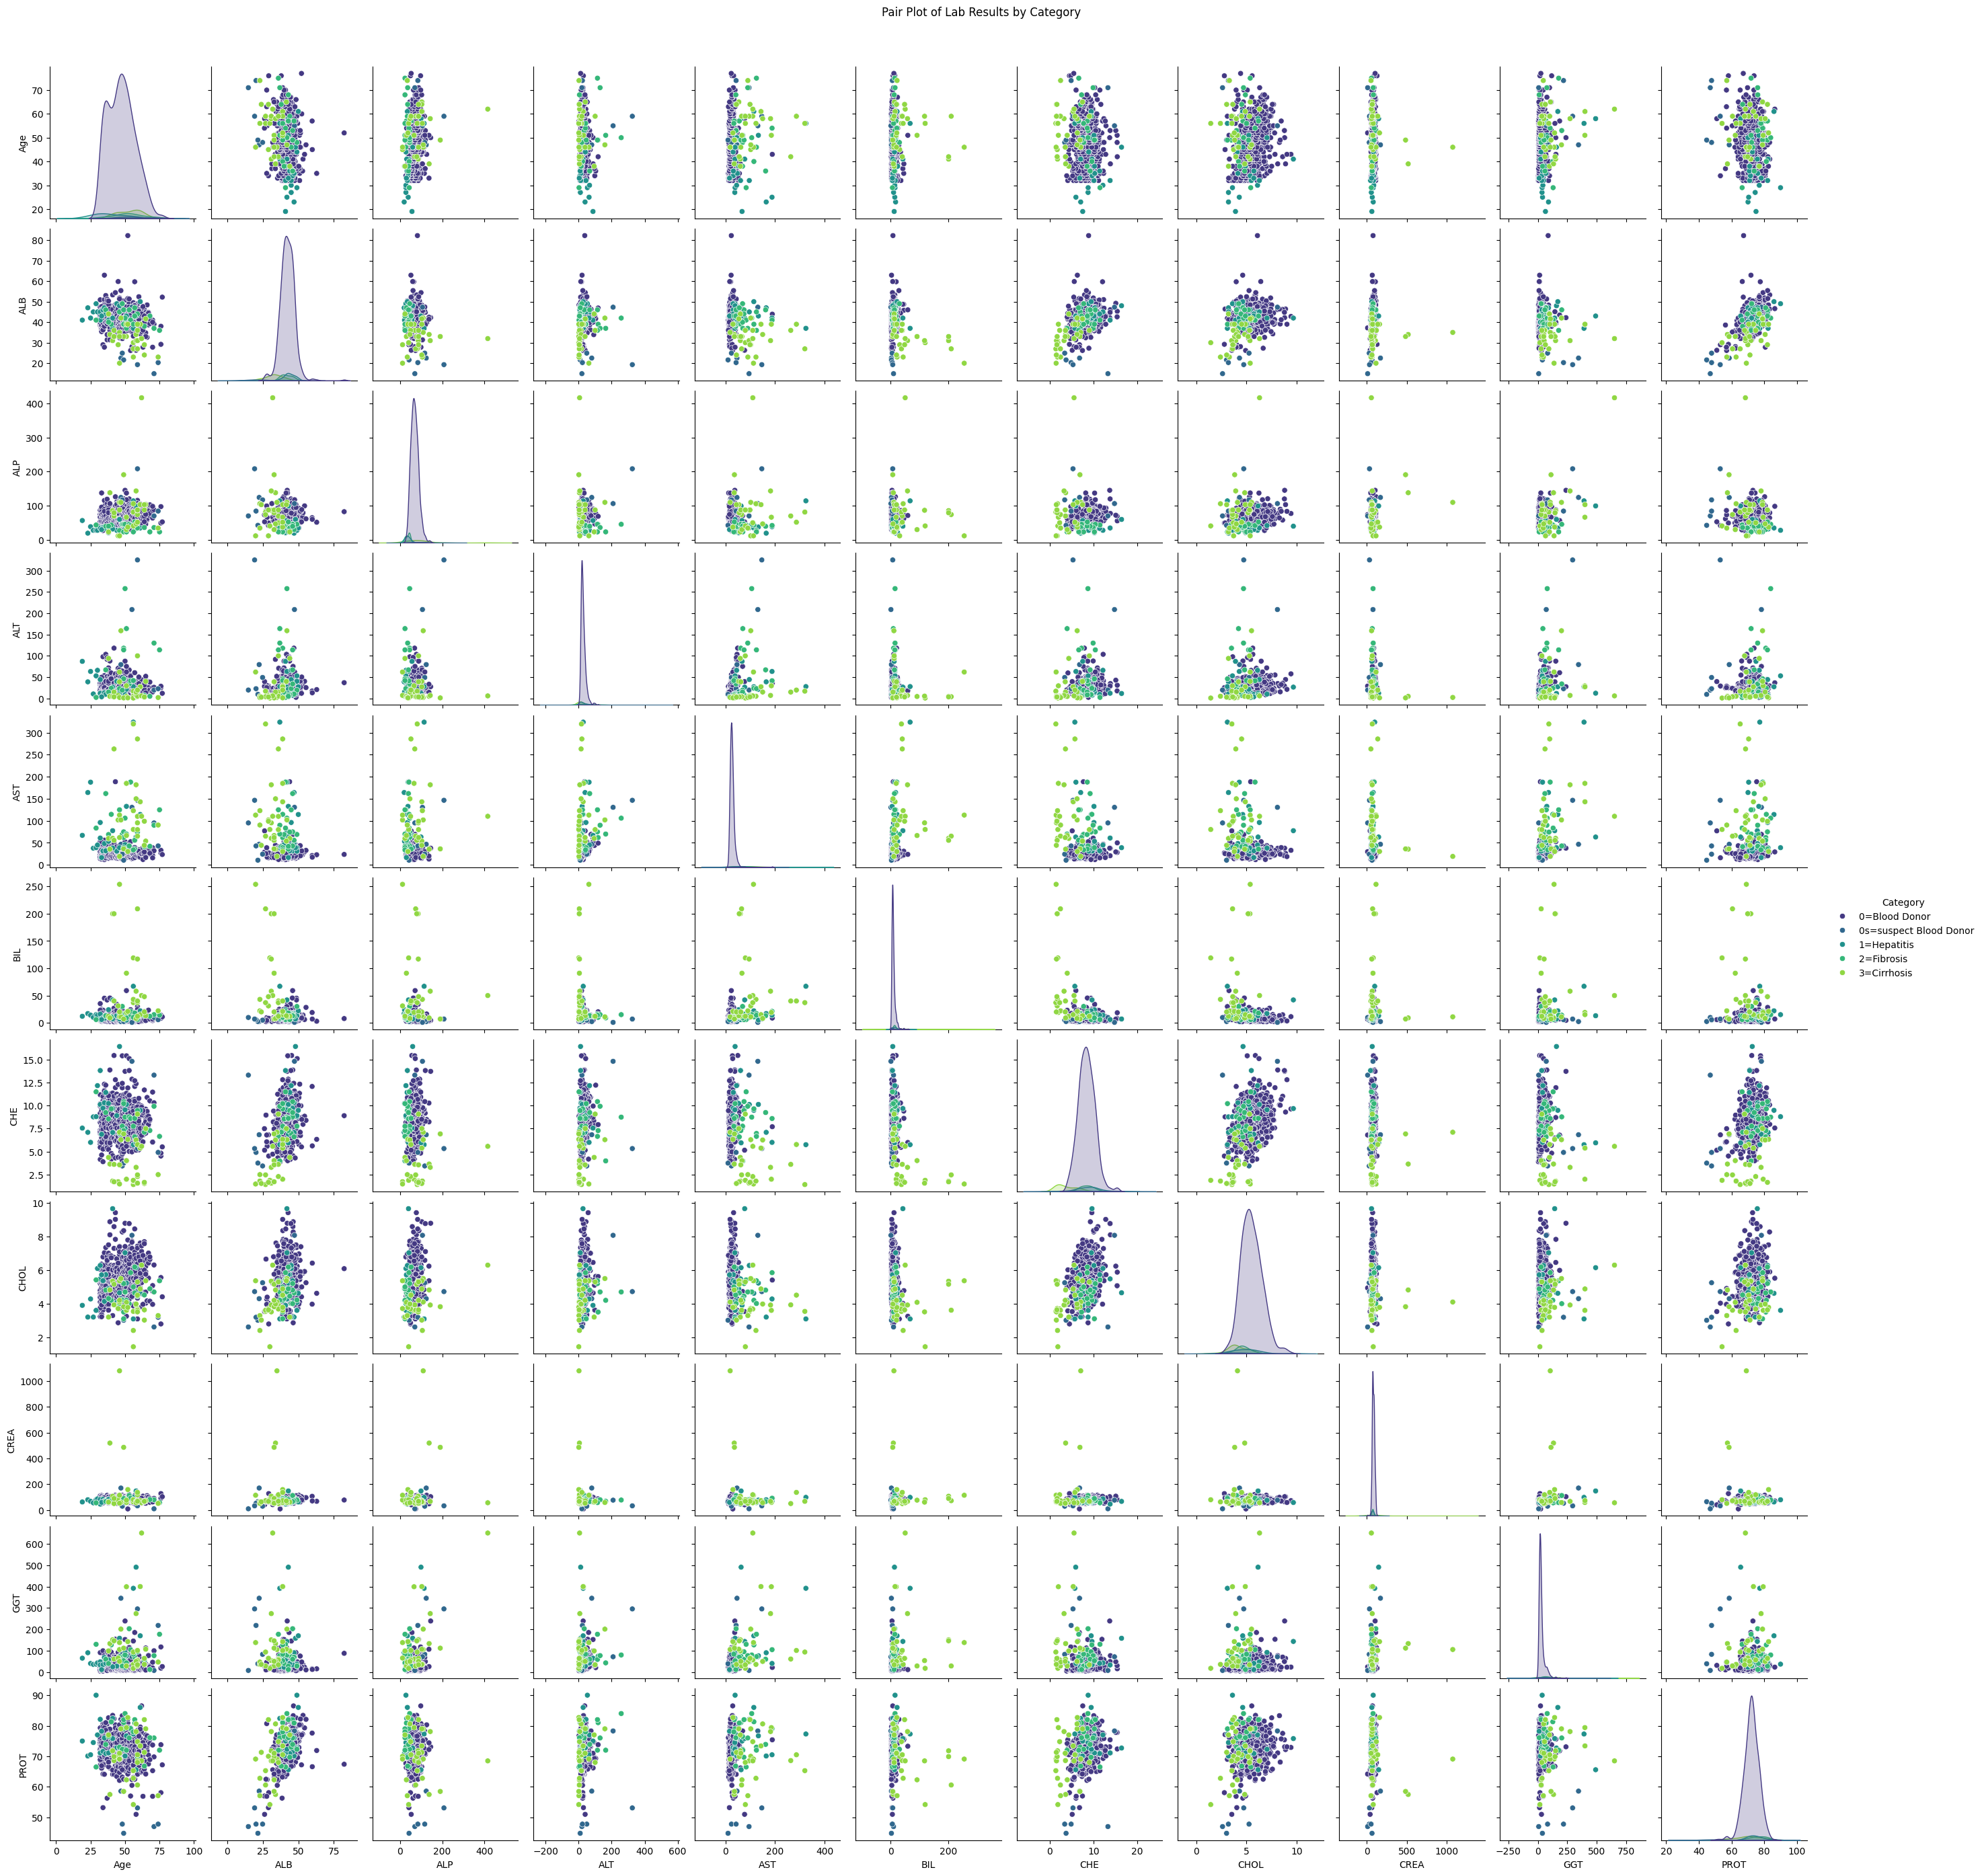

In [ ]:
sns.pairplot(cleaned_df, hue='Category', palette='viridis')
plt.suptitle('Pair Plot of Lab Results by Category', y=1.02)

## Module 4
**Date:** 9th August, 2025

### 2-D Statistical Data Analysis
In this section, we'll explore relationships between two variables using various statistical measures and visualizations.

#### Covariance Analysis

In [ ]:
# Calculate covariance between numeric variables
numeric_cols = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Covariance between Age and liver enzymes
covariance_age_alt = np.cov(cleaned_df['Age'].dropna(), cleaned_df['ALT'].dropna())[0, 1]
covariance_age_ast = np.cov(cleaned_df['Age'].dropna(), cleaned_df['AST'].dropna())[0, 1]

print("2-D Statistical Analysis - Covariance:")
print(f"Covariance between Age and ALT: {covariance_age_alt:.2f}")
print(f"Covariance between Age and AST: {covariance_age_ast:.2f}")

# Covariance matrix for selected variables
selected_vars = ['ALT', 'AST', 'ALP', 'GGT']
cov_matrix = cleaned_df[selected_vars].cov()
print(f"\nCovariance Matrix for Liver Enzymes:")
print(cov_matrix)

#### Correlation Analysis and Statistical Tests

In [ ]:
from scipy.stats import pearsonr, spearmanr, chi2_contingency

# Pearson correlation coefficient
pearson_corr, pearson_p = pearsonr(cleaned_df['ALT'].dropna(), cleaned_df['AST'].dropna())
print("2-D Correlation Analysis:")
print(f"Pearson correlation between ALT and AST: {pearson_corr:.3f} (p-value: {pearson_p:.3f})")

# Spearman correlation coefficient (rank correlation)
spearman_corr, spearman_p = spearmanr(cleaned_df['ALT'].dropna(), cleaned_df['AST'].dropna())
print(f"Spearman correlation between ALT and AST: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")

# Multiple correlations
correlations_2d = {}
var_pairs = [('ALT', 'AST'), ('ALB', 'PROT'), ('CHOL', 'CREA'), ('Age', 'GGT')]

for var1, var2 in var_pairs:
    corr, p_val = pearsonr(cleaned_df[var1].dropna(), cleaned_df[var2].dropna())
    correlations_2d[f"{var1}-{var2}"] = {'correlation': corr, 'p_value': p_val}

print(f"\nPairwise Correlations:")
for pair, stats in correlations_2d.items():
    print(f"{pair}: r = {stats['correlation']:.3f}, p = {stats['p_value']:.3f}")

### Contingency Tables
Contingency tables help us analyze the relationship between categorical variables.

In [ ]:
# Create age groups for contingency table analysis
cleaned_df['Age_Group'] = pd.cut(cleaned_df['Age'], 
                                bins=[0, 30, 50, 70, 100], 
                                labels=['Young', 'Middle', 'Senior', 'Elderly'])

# Contingency table between Category and Sex
contingency_cat_sex = pd.crosstab(cleaned_df['Category'], cleaned_df['Sex'])
print("Contingency Table: Category vs Sex")
print(contingency_cat_sex)
print()

# Calculate percentages
contingency_cat_sex_pct = pd.crosstab(cleaned_df['Category'], cleaned_df['Sex'], normalize='index') * 100
print("Contingency Table (Row Percentages): Category vs Sex")
print(contingency_cat_sex_pct.round(2))
print()

In [ ]:
# Contingency table between Category and Age Group
contingency_cat_age = pd.crosstab(cleaned_df['Category'], cleaned_df['Age_Group'])
print("Contingency Table: Category vs Age Group")
print(contingency_cat_age)
print()

# Chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_cat_sex)
print("Chi-square Test of Independence (Category vs Sex):")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:")
print(pd.DataFrame(expected, 
                   index=contingency_cat_sex.index, 
                   columns=contingency_cat_sex.columns).round(2))

### n-D Statistical Data Analysis
Analyzing relationships among multiple variables simultaneously using various multivariate techniques.

#### Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numeric columns for PCA
numeric_features = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
pca_data = cleaned_df[numeric_features].dropna()

# Standardize the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(pca_data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("n-D Statistical Analysis - Principal Component Analysis:")
print("Explained Variance Ratio by Component:")
for i, var in enumerate(explained_variance[:5]):
    print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%)")

print(f"\nCumulative Explained Variance:")
for i, cum_var in enumerate(cumulative_variance[:5]):
    print(f"First {i+1} components: {cum_var:.3f} ({cum_var*100:.1f}%)")

# Principal component loadings (first 3 components)
loadings = pca.components_[:3, :].T
loadings_df = pd.DataFrame(loadings, 
                          columns=['PC1', 'PC2', 'PC3'], 
                          index=numeric_features)
print(f"\nPrincipal Component Loadings (First 3 Components):")
print(loadings_df.round(3))

#### Multivariate Statistical Measures

In [ ]:
# Multiple correlation coefficient (R-squared from regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Predict ALT using multiple variables
X = cleaned_df[['Age', 'AST', 'ALP', 'GGT']].dropna()
y = cleaned_df.loc[X.index, 'ALT']

# Fit multiple regression model
reg_model = LinearRegression()
reg_model.fit(X, y)
y_pred = reg_model.predict(X)

# Multiple correlation coefficient
multiple_r_squared = r2_score(y, y_pred)
multiple_r = np.sqrt(multiple_r_squared)

print("Multivariate Analysis:")
print(f"Multiple Correlation Coefficient (R): {multiple_r:.3f}")
print(f"Multiple R-squared: {multiple_r_squared:.3f}")
print(f"Adjusted R-squared: {1 - (1 - multiple_r_squared) * (len(y) - 1) / (len(y) - X.shape[1] - 1):.3f}")

# Partial correlations (using residuals method)
def partial_correlation(df, x, y, control_vars):
    """Calculate partial correlation between x and y, controlling for control_vars"""
    # Remove rows with missing values
    data_clean = df[[x, y] + control_vars].dropna()
    
    # Regress x on control variables
    X_control = data_clean[control_vars]
    reg_x = LinearRegression().fit(X_control, data_clean[x])
    residuals_x = data_clean[x] - reg_x.predict(X_control)
    
    # Regress y on control variables  
    reg_y = LinearRegression().fit(X_control, data_clean[y])
    residuals_y = data_clean[y] - reg_y.predict(X_control)
    
    # Correlation between residuals
    return np.corrcoef(residuals_x, residuals_y)[0, 1]

# Calculate partial correlations
partial_corr_alt_ast = partial_correlation(cleaned_df, 'ALT', 'AST', ['Age', 'ALP'])
print(f"\nPartial correlation between ALT and AST (controlling for Age, ALP): {partial_corr_alt_ast:.3f}")

# Mahalanobis distance for outlier detection in multivariate space
from scipy.spatial.distance import mahalanobis

# Select a subset of variables for demonstration
subset_vars = ['ALT', 'AST', 'ALP', 'GGT']
subset_data = cleaned_df[subset_vars].dropna()

# Calculate covariance matrix and its inverse
cov_matrix = np.cov(subset_data.T)
cov_inv = np.linalg.inv(cov_matrix)
mean_vector = subset_data.mean().values

# Calculate Mahalanobis distances
mahal_distances = []
for idx, row in subset_data.iterrows():
    distance = mahalanobis(row.values, mean_vector, cov_inv)
    mahal_distances.append(distance)

# Identify multivariate outliers (using 97.5th percentile as threshold)
threshold = np.percentile(mahal_distances, 97.5)
n_outliers = sum(d > threshold for d in mahal_distances)

print(f"\nMultivariate Outlier Detection (Mahalanobis Distance):")
print(f"Threshold (97.5th percentile): {threshold:.2f}")
print(f"Number of multivariate outliers: {n_outliers}")
print(f"Percentage of outliers: {(n_outliers/len(mahal_distances))*100:.1f}%")

### Advanced Visualizations
Comprehensive visualization techniques including scatter plots, dot charts, and bar plots.

#### Advanced Scatter Plots

In [ ]:
# Enhanced scatter plots with multiple dimensions
plt.figure(figsize=(15, 12))

# 1. Basic scatter plot with trend line
plt.subplot(2, 3, 1)
sns.scatterplot(data=cleaned_df, x='ALT', y='AST', hue='Category', alpha=0.7)
# Add trend line
z = np.polyfit(cleaned_df['ALT'].dropna(), cleaned_df['AST'].dropna(), 1)
p = np.poly1d(z)
plt.plot(cleaned_df['ALT'].dropna(), p(cleaned_df['ALT'].dropna()), "r--", alpha=0.8)
plt.title('ALT vs AST by Category (with trend line)')
plt.xlabel('ALT')
plt.ylabel('AST')

# 2. Scatter plot with size mapping
plt.subplot(2, 3, 2)
sns.scatterplot(data=cleaned_df, x='Age', y='GGT', 
                size='ALT', hue='Category', sizes=(20, 200), alpha=0.7)
plt.title('Age vs GGT (size = ALT level)')
plt.xlabel('Age')
plt.ylabel('GGT')

# 3. Scatter plot matrix (subset)
plt.subplot(2, 3, 3)
scatter_vars = ['ALT', 'AST', 'ALP']
scatter_data = cleaned_df[scatter_vars + ['Category']].dropna()
for i, category in enumerate(scatter_data['Category'].unique()):
    cat_data = scatter_data[scatter_data['Category'] == category]
    plt.scatter(cat_data['ALT'], cat_data['AST'], 
               label=category, alpha=0.6, s=30)
plt.xlabel('ALT')
plt.ylabel('AST')
plt.title('ALT vs AST by Category')
plt.legend()

# 4. 3D scatter plot representation (projected to 2D with color)
plt.subplot(2, 3, 4)
scatter = plt.scatter(cleaned_df['ALT'], cleaned_df['AST'], 
                     c=cleaned_df['ALP'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='ALP levels')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.title('ALT vs AST (colored by ALP)')

# 5. Marginal plots style scatter
plt.subplot(2, 3, 5)
sns.scatterplot(data=cleaned_df, x='CHOL', y='PROT', hue='Sex', alpha=0.7)
plt.title('CHOL vs PROT by Sex')

# 6. Correlation scatter with confidence interval
plt.subplot(2, 3, 6)
sns.regplot(data=cleaned_df, x='Age', y='ALB', scatter_kws={'alpha':0.5})
plt.title('Age vs ALB with Confidence Interval')

plt.tight_layout()
plt.show()

#### Dot Charts

In [ ]:
# Various types of dot charts
plt.figure(figsize=(15, 10))

# 1. Cleveland dot plot for mean values by category
plt.subplot(2, 3, 1)
category_means = cleaned_df.groupby('Category')[['ALT', 'AST', 'ALP']].mean()
for i, col in enumerate(['ALT', 'AST', 'ALP']):
    plt.plot(category_means[col], range(len(category_means)), 
             'o-', label=col, markersize=8, linewidth=2)
plt.yticks(range(len(category_means)), category_means.index)
plt.xlabel('Mean Values')
plt.title('Mean Enzyme Levels by Category')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Dot plot with error bars
plt.subplot(2, 3, 2)
category_stats = cleaned_df.groupby('Category')['GGT'].agg(['mean', 'std'])
y_pos = range(len(category_stats))
plt.errorbar(category_stats['mean'], y_pos, 
             xerr=category_stats['std'], fmt='o', capsize=5, capthick=2)
plt.yticks(y_pos, category_stats.index)
plt.xlabel('GGT Levels')
plt.title('GGT Levels by Category (Mean ± SD)')
plt.grid(True, alpha=0.3)

# 3. Lollipop chart
plt.subplot(2, 3, 3)
sex_means = cleaned_df.groupby('Sex')['Age'].mean().sort_values()
y_pos = range(len(sex_means))
plt.hlines(y_pos, 0, sex_means.values, colors='skyblue', linewidth=3)
plt.plot(sex_means.values, y_pos, 'o', markersize=10, color='navy')
plt.yticks(y_pos, ['Male' if x == 'm' else 'Female' for x in sex_means.index])
plt.xlabel('Mean Age')
plt.title('Mean Age by Sex (Lollipop Chart)')
plt.grid(True, alpha=0.3)

# 4. Strip plot (dot plot with jitter)
plt.subplot(2, 3, 4)
sns.stripplot(data=cleaned_df, y='Category', x='CHOL', 
              size=4, alpha=0.7, jitter=True)
plt.title('CHOL Distribution by Category (Strip Plot)')
plt.xlabel('CHOL Levels')

# 5. Slope graph (before/after style)
plt.subplot(2, 3, 5)
# Create artificial before/after data by splitting age groups
young_old = cleaned_df.groupby(pd.cut(cleaned_df['Age'], bins=2, labels=['Younger', 'Older']))
slope_data = young_old[['ALT', 'AST']].mean()
categories = ['ALT', 'AST']
for i, cat in enumerate(categories):
    plt.plot([0, 1], [slope_data.loc['Younger', cat], slope_data.loc['Older', cat]], 
             'o-', linewidth=2, markersize=8, label=cat)
plt.xticks([0, 1], ['Younger Group', 'Older Group'])
plt.ylabel('Mean Enzyme Levels')
plt.title('Enzyme Levels: Younger vs Older')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Dot plot with grouping
plt.subplot(2, 3, 6)
age_group_means = cleaned_df.groupby(['Age_Group', 'Sex'])['PROT'].mean().unstack()
x_pos = np.arange(len(age_group_means))
width = 0.35
for i, sex in enumerate(['f', 'm']):
    if sex in age_group_means.columns:
        plt.scatter(x_pos + i*width, age_group_means[sex], 
                   s=100, alpha=0.7, label='Female' if sex == 'f' else 'Male')
plt.xticks(x_pos + width/2, age_group_means.index)
plt.xlabel('Age Group')
plt.ylabel('Mean PROT')
plt.title('Mean PROT by Age Group and Sex')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Advanced Bar Plots

In [ ]:
# Comprehensive bar plot visualizations
plt.figure(figsize=(16, 12))

# 1. Grouped bar chart
plt.subplot(2, 4, 1)
category_sex_counts = pd.crosstab(cleaned_df['Category'], cleaned_df['Sex'])
category_sex_counts.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'skyblue'])
plt.title('Patient Count by Category and Sex')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=45)

# 2. Stacked bar chart
plt.subplot(2, 4, 2)
category_sex_pct = pd.crosstab(cleaned_df['Category'], cleaned_df['Sex'], normalize='index') * 100
category_sex_pct.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightcoral', 'skyblue'])
plt.title('Sex Distribution by Category (%)')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=45)

# 3. Horizontal bar chart with values
plt.subplot(2, 4, 3)
category_counts = cleaned_df['Category'].value_counts()
bars = plt.barh(category_counts.index, category_counts.values, color='lightgreen')
plt.title('Patient Count by Category')
plt.xlabel('Count')
# Add value labels on bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             str(category_counts.values[i]), va='center')

# 4. Bar chart with error bars
plt.subplot(2, 4, 4)
enzyme_means = cleaned_df[['ALT', 'AST', 'ALP', 'GGT']].mean()
enzyme_stds = cleaned_df[['ALT', 'AST', 'ALP', 'GGT']].std()
bars = plt.bar(enzyme_means.index, enzyme_means.values, 
               yerr=enzyme_stds.values, capsize=5, color='orange', alpha=0.7)
plt.title('Mean Enzyme Levels (±SD)')
plt.ylabel('Levels')
plt.xticks(rotation=45)

# 5. Multiple grouped bar chart
plt.subplot(2, 4, 5)
age_category_stats = cleaned_df.groupby('Age_Group')[['ALT', 'AST']].mean()
x = np.arange(len(age_category_stats.index))
width = 0.35
plt.bar(x - width/2, age_category_stats['ALT'], width, label='ALT', alpha=0.8)
plt.bar(x + width/2, age_category_stats['AST'], width, label='AST', alpha=0.8)
plt.xlabel('Age Group')
plt.ylabel('Mean Levels')
plt.title('Mean ALT and AST by Age Group')
plt.xticks(x, age_category_stats.index, rotation=45)
plt.legend()

# 6. Tornado/Butterfly chart (diverging bar chart)
plt.subplot(2, 4, 6)
# Calculate differences from overall mean
overall_mean = cleaned_df['GGT'].mean()
category_means = cleaned_df.groupby('Category')['GGT'].mean()
differences = category_means - overall_mean
colors = ['red' if x < 0 else 'green' for x in differences]
bars = plt.barh(range(len(differences)), differences.values, color=colors, alpha=0.7)
plt.yticks(range(len(differences)), differences.index)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.title('GGT Deviation from Mean by Category')
plt.xlabel('Difference from Overall Mean')

# 7. Pyramid/Population chart
plt.subplot(2, 4, 7)
age_sex_counts = cleaned_df.groupby(['Age_Group', 'Sex']).size().unstack(fill_value=0)
if 'm' in age_sex_counts.columns:
    plt.barh(range(len(age_sex_counts)), -age_sex_counts['m'], 
             color='lightblue', alpha=0.7, label='Male')
if 'f' in age_sex_counts.columns:
    plt.barh(range(len(age_sex_counts)), age_sex_counts['f'], 
             color='lightpink', alpha=0.7, label='Female')
plt.yticks(range(len(age_sex_counts)), age_sex_counts.index)
plt.xlabel('Count')
plt.title('Population Pyramid by Age Group')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.legend()

# 8. Waterfall chart simulation
plt.subplot(2, 4, 8)
# Create cumulative effect visualization
categories = ['0=Suspicion', '0s=Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'][:len(cleaned_df['Category'].unique())]
category_means = cleaned_df.groupby('Category')['ALT'].mean().values
cumulative = np.cumsum(np.concatenate([[0], category_means]))

for i in range(len(category_means)):
    plt.bar(i, category_means[i], bottom=cumulative[i], 
           alpha=0.7, color=plt.cm.Set3(i))
    # Add connecting lines
    if i > 0:
        plt.plot([i-0.4, i-0.6], [cumulative[i], cumulative[i]], 'k--', alpha=0.5)

plt.title('Cumulative ALT Levels by Category')
plt.ylabel('ALT Levels')
plt.xticks(range(len(categories)), categories, rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Additional Specialized Visualizations

In [ ]:
# Additional specialized visualizations
plt.figure(figsize=(15, 10))

# 1. Bubble chart (3D scatter with bubble size)
plt.subplot(2, 3, 1)
bubble_data = cleaned_df[['ALT', 'AST', 'Age', 'Category']].dropna()
categories = bubble_data['Category'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    cat_data = bubble_data[bubble_data['Category'] == category]
    plt.scatter(cat_data['ALT'], cat_data['AST'], 
               s=cat_data['Age']*2, alpha=0.6, 
               color=colors[i], label=category)

plt.xlabel('ALT')
plt.ylabel('AST')
plt.title('ALT vs AST (bubble size = Age)')
plt.legend()

# 2. Hexbin plot for density
plt.subplot(2, 3, 2)
plt.hexbin(cleaned_df['ALT'].dropna(), cleaned_df['AST'].dropna(), 
           gridsize=20, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.title('ALT vs AST Density (Hexbin)')

# 3. Violin plot with strip plot overlay
plt.subplot(2, 3, 3)
sns.violinplot(data=cleaned_df, x='Category', y='GGT', alpha=0.7)
sns.stripplot(data=cleaned_df, x='Category', y='GGT', 
              size=3, color='black', alpha=0.5)
plt.xticks(rotation=45)
plt.title('GGT Distribution by Category\n(Violin + Strip Plot)')

# 4. Radar chart for category profiles
plt.subplot(2, 3, 4, projection='polar')
# Prepare data for radar chart
radar_vars = ['ALT', 'AST', 'ALP', 'GGT']
category_profiles = cleaned_df.groupby('Category')[radar_vars].mean()

# Normalize the data (0-1 scale)
category_profiles_norm = (category_profiles - category_profiles.min()) / (category_profiles.max() - category_profiles.min())

# Number of variables
N = len(radar_vars)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Plot each category
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, (category, values) in enumerate(category_profiles_norm.iterrows()):
    if i < len(colors):
        values_list = values.tolist()
        values_list += values_list[:1]  # Complete the circle
        plt.plot(angles, values_list, 'o-', linewidth=2, 
                label=category, color=colors[i])
        plt.fill(angles, values_list, alpha=0.25, color=colors[i])

plt.xticks(angles[:-1], radar_vars)
plt.title('Category Profiles (Radar Chart)')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# 5. Parallel coordinates plot
plt.subplot(2, 3, 5)
from pandas.plotting import parallel_coordinates

# Prepare data for parallel coordinates
parallel_data = cleaned_df[['ALT', 'AST', 'ALP', 'GGT', 'Category']].dropna()
# Normalize numerical columns
for col in ['ALT', 'AST', 'ALP', 'GGT']:
    parallel_data[col] = (parallel_data[col] - parallel_data[col].min()) / (parallel_data[col].max() - parallel_data[col].min())

# Sample data to avoid overcrowding
sample_data = parallel_data.sample(n=min(100, len(parallel_data)), random_state=42)
parallel_coordinates(sample_data, 'Category', alpha=0.7)
plt.title('Parallel Coordinates Plot\n(Normalized Enzyme Levels)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. Box plot with swarm plot
plt.subplot(2, 3, 6)
sns.boxplot(data=cleaned_df, x='Sex', y='Age', alpha=0.7)
sns.swarmplot(data=cleaned_df, x='Sex', y='Age', 
              size=3, color='red', alpha=0.6)
plt.title('Age Distribution by Sex\n(Box + Swarm Plot)')

plt.tight_layout()
plt.show()

# Print summary statistics for n-D analysis
print("\n" + "="*60)
print("SUMMARY OF n-D STATISTICAL ANALYSIS")
print("="*60)
print(f"Dataset Shape: {cleaned_df.shape}")
print(f"Number of Numerical Variables: {len(numeric_features)}")
print(f"First 3 Principal Components explain: {cumulative_variance[2]*100:.1f}% of variance")
print(f"Multiple R-squared (ALT predicted by Age, AST, ALP, GGT): {multiple_r_squared:.3f}")
print(f"Multivariate outliers detected: {n_outliers} ({(n_outliers/len(mahal_distances))*100:.1f}%)")
print("="*60)